# Early prediction to do dialysis for Chronic Kidney Disease

## Abstract


Mi pregunta es qué relacion hay entre los distintos valores del laboratorio de sangre con las personas que tienen CKD. Y quienes poseen alta posibilidad de considerar que poseen la enfermedad de CKD. También, quienes están por requerir dialisis. Cuál es el valor más representativo para considerar CKD. Intervalo de confianza.

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/dphi-official/Datasets/master/Chronic%20Kidney%20Disease%20(CKD)%20Dataset/ChronicKidneyDisease.csv"
ckd_df = pd.read_csv(url, index_col=False)

In [3]:
ckd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
ckd_df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
# As well as ID is the same numbering, It is changed the id column to 'index'.
ckd_df.set_index('id', inplace=True)
ckd_df.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


### Data Set Information:

We use the following representation to collect the dataset <br />
age - age: 1 to 100  <br />
bp - blood pressure: 90-120/60-80mm Hg (systolic/diastolic)<br />
sg - specific gravity: 1.005 to 1.030<br />
al - albumin: normal range 3.5g/dL - 5g/dL <br />
su - sugar: normal range 0 - 0.8mmol/L<br />
rbc - red blood cells: 'normal' or 'abnormal'.<br />
pc - pus cell: 'normal' or 'abnormal'.<br />
pcc - pus cell clumps: 'present' or 'notpresent'<br />
ba - bacteria: 'pus cells clumps' and 'pus cells'<br />
bgr - blood glucose random: 200mg/dL or higher are diagnostic of diabetes<br />
bu - blood urea: normal range 7mg/dL - 20mg/dL<br />
sc - serum creatinine: Normal range for adult men is 0.74 to 1.35 mg/dL, and adult women 0.59 to 1.04 mg/dL<br />
sod - sodium: normal range in the blood is between 135 and 145 milliequivalents per liter (mEQ/L)<br />
pot - potassium: normal range in the blood is between 3.7 and 5.2 milliequivalents per liter (mEQ/L)<br />
hemo - hemoglobin: normal range in the blood is: adult men 13.6 – 17.7 gm/dL, and adult women 12.1 – 15.1 gm/dL<br />
pcv - packed cell volume: normal range is: adult men 40.7-50.3%, and adult women 36.1 to 44.3%<br />
wc - white blood cell count: normal range is approximately 4,500-10,000 white blood cells per mm3<br />
rc - red blood cell count: The normal range is, adult men 4.3-5.9 million/mm3 and adult women 3.5-5.5 million/mm3<br />
htn - hypertension: 'yes' or 'no'<br />
dm - diabetes mellitus: 'yes' or 'no'<br />
cad - coronary artery disease: 'yes' or 'no'<br />
appet - appetite: 'good' or 'poor' <br />
pe - pedal edema: 'yes' or 'no'<br />
ane - anemia: 'yes' or 'no' <br />
class - classification: 'ckd' or 'notckd' <br />

In [6]:
columns_description = ['age','blood pressure','specific gravity','albumin','sugar',
       'red blood cells','pus cell','pus cell clumps','bacteria',
       'blood glucose random','blood urea','serum creatinine',
       'sodium','potassium','hemoglobin','packed cell volume',
       'white blood cell count','red blood cell count','hypertension',
       'diabetes mellitus','coronary artery disease','appetite','pedal edema','anemia','classification']

In [7]:
ckd_df.columns = columns_description
ckd_df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
ckd_df.describe()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
nan_value = ckd_df.isnull().sum()
print(nan_value)

age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          70
white blood cell count     105
red blood cell count       130
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
classification               0
dtype: int64


In [10]:
ckd_df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [11]:
ckd_df['classification'].replace(to_replace='ckd\t', value='ckd', inplace=True)
ckd_df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [12]:
ckd_age = ckd_df[ckd_df['classification']=='ckd']['age']
ckd_filled_df = ckd_df
if ckd_age.isnull().sum() > 0: # If there is any CKD patient without age assignation, it will fill with the average of CKD patient ages.
    ckd_age_mean = ckd_df[ckd_df['age']!=pd.NA]['age'].mean()
    ckd_filled_df['age'].fillna(ckd_age_mean)


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0.98, 'Chronic Kidney Disease - CKD\nCKD classification, Serum creatinine, Sodium')

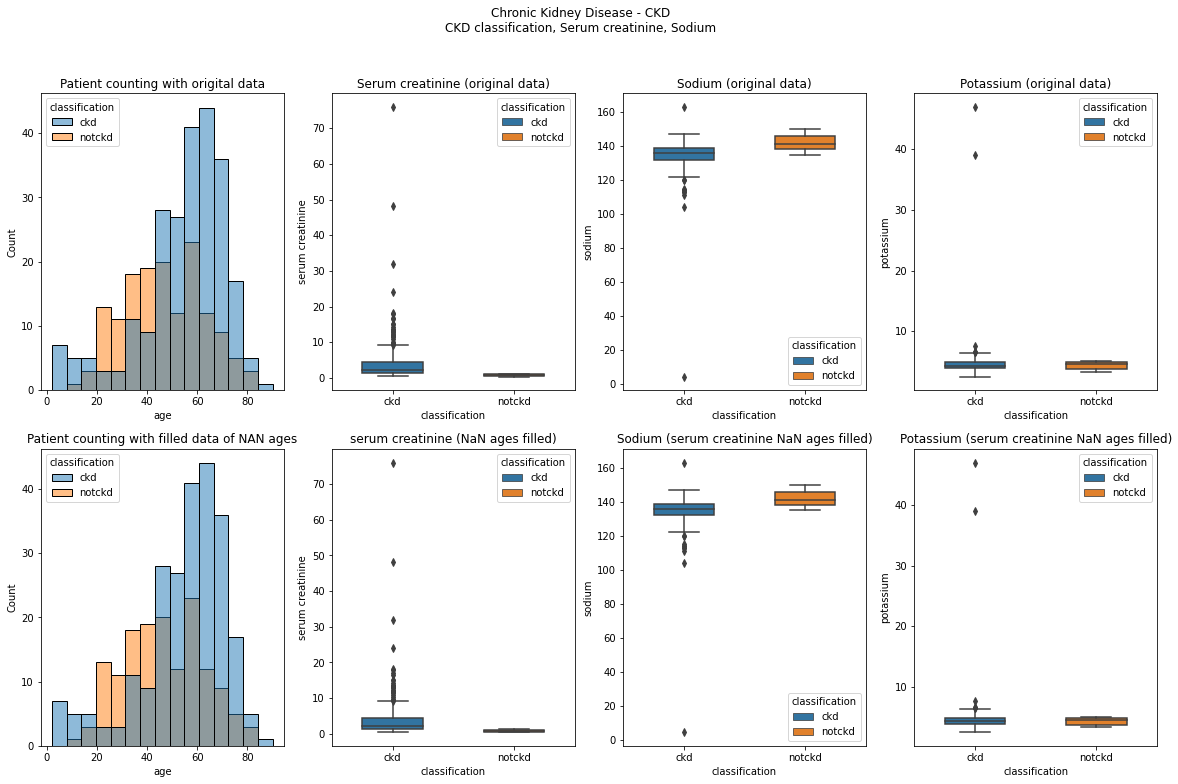

In [14]:
fig, axs = plt.subplots(2,4,figsize=(20, 12))
axs[0,0].set_title('Patient counting with origital data')
sns.histplot(data=ckd_df, x='age', hue="classification", ax=axs[0,0])
axs[0,1].set_title('Serum creatinine (original data)')
sns.boxplot(x='classification',y='serum creatinine', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,1])
axs[0,2].set_title('Sodium (original data)')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,2])
axs[0,3].set_title('Potassium (original data)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,3])

axs[1,0].set_title('Patient counting with filled data of NAN ages')
sns.histplot(data=ckd_filled_df, x='age', hue="classification", ax=axs[1,0])
axs[1,1].set_title('serum creatinine (NaN ages filled)')
sns.boxplot(x='classification',y='serum creatinine', hue = 'classification', data=ckd_filled_df, width=0.5, dodge=False, ax=axs[1,1])
axs[1,2].set_title('Sodium (serum creatinine NaN ages filled)')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_filled_df, width=0.5, dodge=False, ax=axs[1,2])
axs[1,3].set_title('Potassium (serum creatinine NaN ages filled)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_filled_df, width=0.5, dodge=False, ax=axs[1,3])


fig.suptitle("Chronic Kidney Disease - CKD\nCKD classification, Serum creatinine, Sodium")

It is possible to check that by replacing NaN value of ages for mean ages, it doesn't modify the main feature of the data frame.
However, we can verify that there is some outline data of “serum creatinine” (main value to be observed for CKD), “sodium” and "potassium". Hence, we have to remove it from our data frame and review if there is another outline data. 

In [15]:
# Value of quartils
Q1_sc  = ckd_filled_df['serum creatinine'].quantile(0.25)
Q3_sc  = ckd_filled_df['serum creatinine'].quantile(0.75)
IQR_sc = Q3_sc - Q1_sc
print(f"SERUM CREATININE")
print(f"Q1_sc:{Q1_sc}\t Q3_sc:{Q3_sc}\t IQR_sc:{IQR_sc}")

Q1_sod  = ckd_filled_df['sodium'].quantile(0.25)
Q3_sod  = ckd_filled_df['sodium'].quantile(0.75)
IQR_sod = Q3_sod - Q1_sod
print(f"SODIUM:")
print(f"Q1_sod:{Q1_sod}\t Q3_sod:{Q3_sod}\t IQR_sod:{IQR_sod}")

Q1_pot  = ckd_filled_df['potassium'].quantile(0.25)
Q3_pot  = ckd_filled_df['potassium'].quantile(0.75)
IQR_pot = Q3_pot - Q1_pot
print(f"POTASSIUM:")
print(f"Q1_pot:{Q1_pot}\t Q3_pot:{Q3_pot}\t IQR_pot:{IQR_pot}")

SERUM CREATININE
Q1_sc:0.9	 Q3_sc:2.8	 IQR_sc:1.9
SODIUM:
Q1_sod:135.0	 Q3_sod:142.0	 IQR_sod:7.0
POTASSIUM:
Q1_pot:3.8	 Q3_pot:4.9	 IQR_pot:1.1000000000000005


In [16]:
# Clean outlines 
ckd_cleaned_df = ckd_filled_df[ckd_filled_df['serum creatinine']> (Q1_sc - 1.5*IQR_sc)]
ckd_cleaned_df = ckd_filled_df[ckd_filled_df['serum creatinine']< (Q3_sc + 1.5*IQR_sc)]

ckd_cleaned_df = ckd_cleaned_df[ckd_cleaned_df['sodium']> (Q1_sod - 1.5*IQR_sod)]
ckd_cleaned_df = ckd_cleaned_df[ckd_cleaned_df['sodium']< (Q3_sod + 1.5*IQR_sod)]

ckd_cleaned_df = ckd_cleaned_df[ckd_cleaned_df['potassium']> (Q1_pot - 1.5*IQR_pot)]
ckd_cleaned_df = ckd_cleaned_df[ckd_cleaned_df['potassium']< (Q3_pot + 1.5*IQR_pot)]

Text(0.5, 0.98, 'Chronic Kidney Disease CKD classification, Serum creatinine, Sodium without outlines (1st cleaned)')

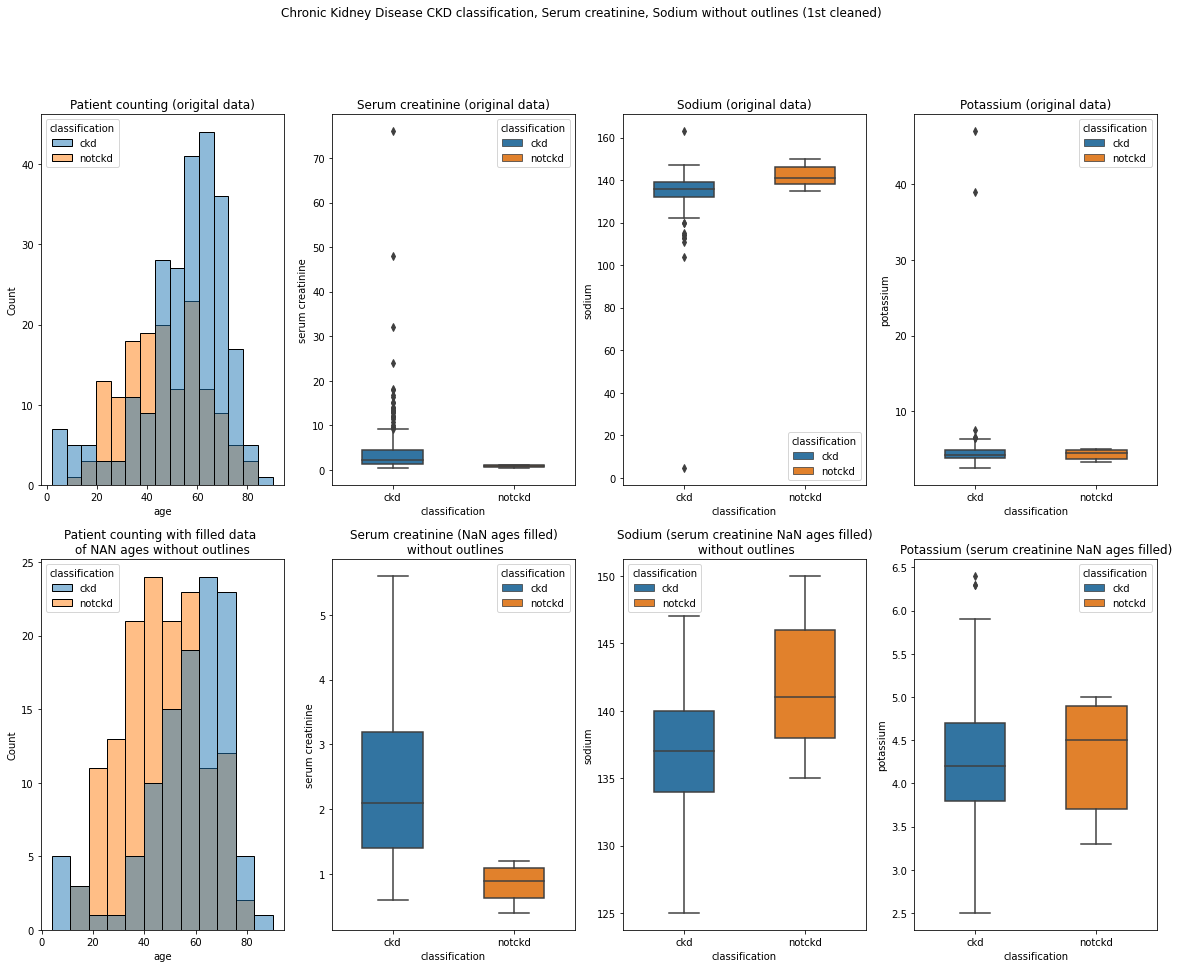

In [17]:
# Verify outline data 
fig, axs = plt.subplots(2,4,figsize=(20, 15))

axs[0,0].set_title('Patient counting (origital data)')
sns.histplot(data=ckd_df, x='age', hue="classification", ax=axs[0,0])
axs[0,1].set_title('Serum creatinine (original data)')
sns.boxplot(x='classification',y='serum creatinine', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,1])
axs[0,2].set_title('Sodium (original data)')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,2])
axs[0,3].set_title('Potassium (original data)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,3])

axs[1,0].set_title('Patient counting with filled data \nof NAN ages without outlines')
sns.histplot(data=ckd_cleaned_df, x='age', hue="classification", ax=axs[1,0])
axs[1,1].set_title('Serum creatinine (NaN ages filled)\n without outlines')
sns.boxplot(data=ckd_cleaned_df, x='classification',y='serum creatinine', hue = 'classification', width=0.5, dodge=False, ax=axs[1,1])
axs[1,2].set_title('Sodium (serum creatinine NaN ages filled)\n without outlines')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_cleaned_df, width=0.5, dodge=False, ax=axs[1,2])
axs[1,3].set_title('Potassium (serum creatinine NaN ages filled)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_cleaned_df, width=0.5, dodge=False, ax=axs[1,3])

fig.suptitle('Chronic Kidney Disease CKD classification, Serum creatinine, Sodium without outlines (1st cleaned)')

In [24]:
ckd_cleaned_df = ckd_cleaned_df[ckd_cleaned_df['potassium']> (Q1_pot - 1.5*IQR_pot)]
ckd_cleaned_df = ckd_cleaned_df[ckd_cleaned_df['potassium']< (Q3_pot + 1.2*IQR_pot)]

Q1_pot  = ckd_cleaned_df['potassium'].quantile(0.25)
Q3_pot  = ckd_cleaned_df['potassium'].quantile(0.75)
IQR_pot = Q3_pot - Q1_pot
print(f"POTASSIUM:")
print(f"Q1_pot:{Q1_pot}\t Q3_pot:{Q3_pot}\t IQR_pot:{IQR_pot}")

POTASSIUM:
Q1_pot:3.8	 Q3_pot:4.9	 IQR_pot:1.1000000000000005


Text(0.5, 0.98, 'Chronic Kidney Disease CKD classification, Serum creatinine, Sodium without outlines (2nd cleaned)')

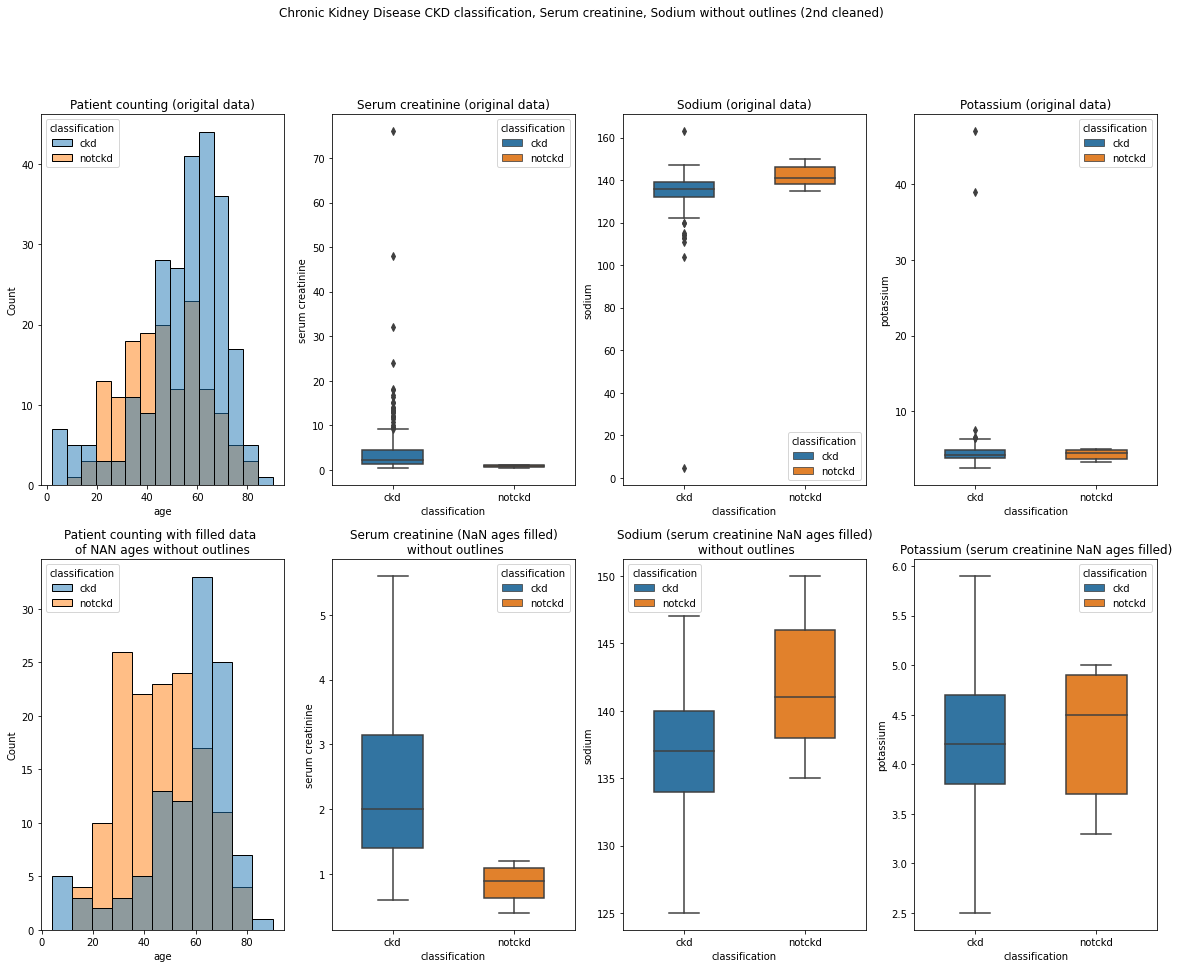

In [25]:
# Verify (2nd) outline data 
fig, axs = plt.subplots(2,4,figsize=(20, 15))

axs[0,0].set_title('Patient counting (origital data)')
sns.histplot(data=ckd_df, x='age', hue="classification", ax=axs[0,0])
axs[0,1].set_title('Serum creatinine (original data)')
sns.boxplot(x='classification',y='serum creatinine', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,1])
axs[0,2].set_title('Sodium (original data)')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,2])
axs[0,3].set_title('Potassium (original data)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,3])

axs[1,0].set_title('Patient counting with filled data \nof NAN ages without outlines')
sns.histplot(data=ckd_cleaned_df, x='age', hue="classification", ax=axs[1,0])
axs[1,1].set_title('Serum creatinine (NaN ages filled)\n without outlines')
sns.boxplot(data=ckd_cleaned_df, x='classification',y='serum creatinine', hue = 'classification', width=0.5, dodge=False, ax=axs[1,1])
axs[1,2].set_title('Sodium (serum creatinine NaN ages filled)\n without outlines')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_cleaned_df, width=0.5, dodge=False, ax=axs[1,2])
axs[1,3].set_title('Potassium (serum creatinine NaN ages filled)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_cleaned_df, width=0.5, dodge=False, ax=axs[1,3])

fig.suptitle('Chronic Kidney Disease CKD classification, Serum creatinine, Sodium without outlines (2nd cleaned)')

It is possible that it change if we drop patient data 

In [23]:
# Resulting values of quartils
print("Resulting values of quartils")
Q1_sc  = ckd_filled_df['serum creatinine'].quantile(0.25)
Q3_sc  = ckd_filled_df['serum creatinine'].quantile(0.75)
IQR_sc = Q3_sc - Q1_sc
print(f"SERUM CREATININE")
print(f"Q1_sc:{Q1_sc}\t Q3_sc:{Q3_sc}\t IQR_sc:{IQR_sc}")
print(f"Lower sc inliner: {Q1_sc - 1.5*IQR_sc} \nUpper sc inliner: {Q3_sc + 1.5*IQR_sc}\n")

Q1_sod  = ckd_filled_df['sodium'].quantile(0.25)
Q3_sod  = ckd_filled_df['sodium'].quantile(0.75)
IQR_sod = Q3_sod - Q1_sod
print(f"SODIUM:")
print(f"Q1_sod:{Q1_sod}\t Q3_sod:{Q3_sod}\t IQR_sod:{IQR_sod}")
print(f"Lower sod inliner: {Q1_sod - 1.5*IQR_sod} \nUpper sod inliner: {Q3_sod + 1.5*IQR_sod}\n")

Q1_pot  = ckd_cleaned_df['potassium'].quantile(0.25)
Q3_pot  = ckd_cleaned_df['potassium'].quantile(0.75)
IQR_pot = Q3_pot - Q1_pot
print(f"POTASSIUM:")
print(f"Q1_pot:{Q1_pot}\t Q3_pot:{Q3_pot}\t IQR_pot:{IQR_pot}")
print(f"Lower sod inliner: {Q1_pot - 1.5*IQR_pot} \nUpper sod inliner: {Q3_pot + 1.2*IQR_pot}\n")

Resulting values of quartils
SERUM CREATININE
Q1_sc:0.9	 Q3_sc:2.8	 IQR_sc:1.9
Lower sc inliner: -1.9499999999999997 
Upper sc inliner: 5.6499999999999995

SODIUM:
Q1_sod:135.0	 Q3_sod:142.0	 IQR_sod:7.0
Lower sod inliner: 124.5 
Upper sod inliner: 152.5

POTASSIUM:
Q1_pot:3.8	 Q3_pot:4.9	 IQR_pot:1.1000000000000005
Lower sod inliner: 2.149999999999999 
Upper sod inliner: 6.220000000000001



Now, We are going to analysis relation "Serum creatinine" and "Sodium" who has "anemia" and hypertension.

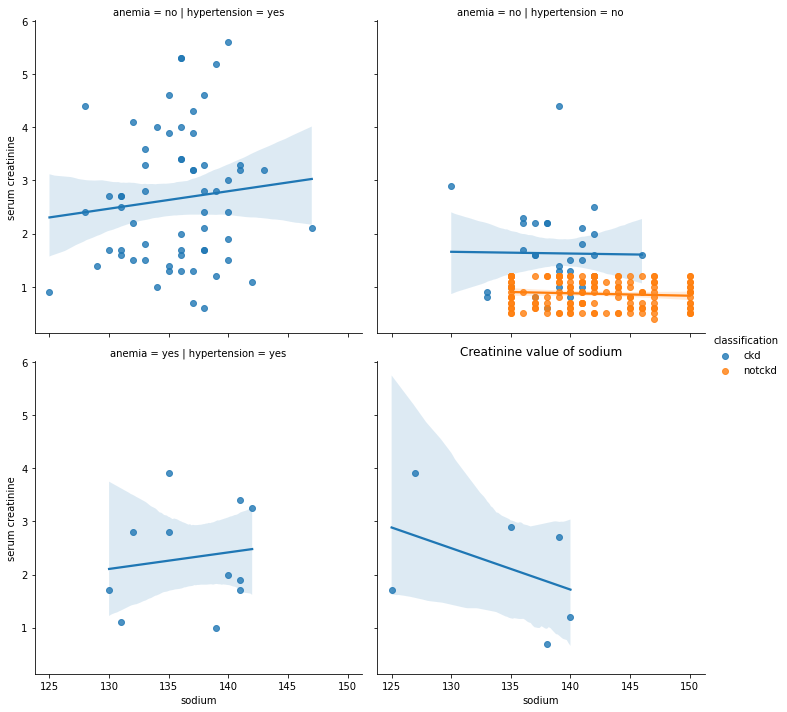

In [27]:
sns.lmplot(x="sodium", y="serum creatinine", hue="classification", col="hypertension", row="anemia", data=ckd_cleaned_df)
ax = plt.gca()
ax.set_title("Creatinine value of sodium")
plt.show()

It is possible prove that people who doesn't have anemia and hypertension are not CKD.

Now, we are goint to plot serum creatinine with ages.

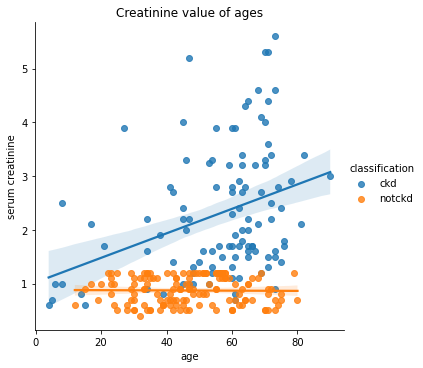

In [28]:
sns.lmplot(x="age", y="serum creatinine", hue="classification", data=ckd_cleaned_df)
ax = plt.gca()
ax.set_title("Creatinine value of ages")
plt.show()

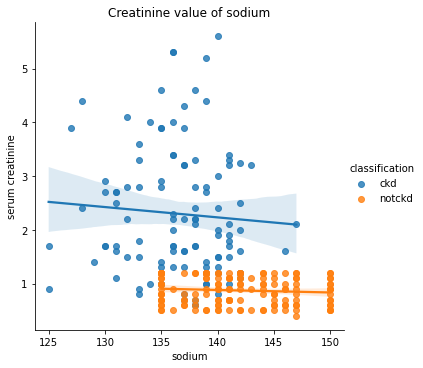

In [29]:
sns.lmplot(x="sodium", y="serum creatinine", hue="classification", data=ckd_cleaned_df)
ax = plt.gca()
ax.set_title("Creatinine value of sodium")
plt.show()

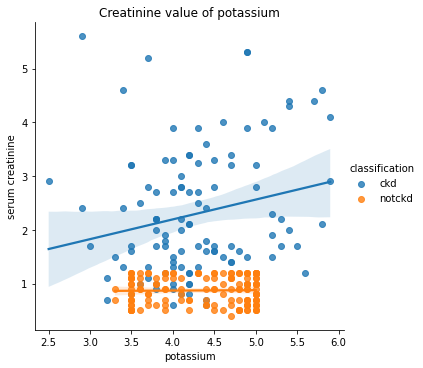

In [33]:
sns.lmplot(x="potassium", y="serum creatinine", hue="classification", data=ckd_cleaned_df)
ax = plt.gca()
ax.set_title("Creatinine value of potassium")

plt.show()

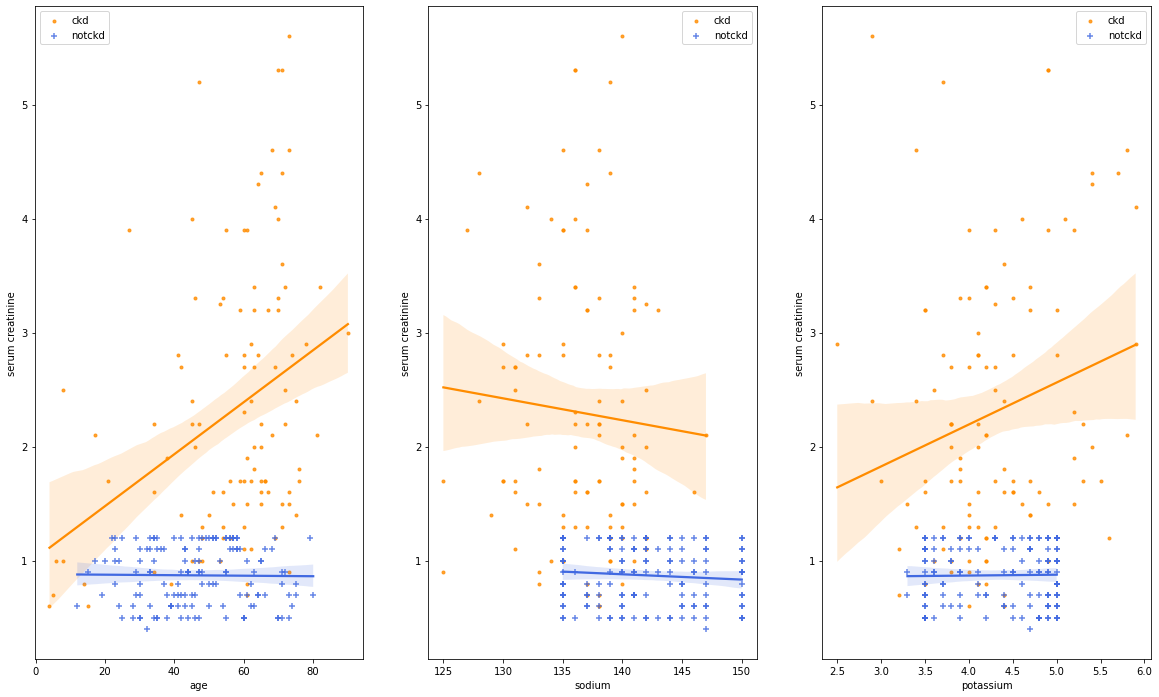

In [49]:
fig, axs = plt.subplots(1,3,figsize=(20, 12))
colors = ['darkorange', 'royalblue']
markers = ['.', '+']

for i, value in enumerate(ckd_cleaned_df["classification"].unique()):
    axs[0] = sns.regplot(x="age", y="serum creatinine", ax=axs[0],color=colors[i],marker=markers[i],data=ckd_cleaned_df[ckd_cleaned_df.classification == value],label=value)
    axs[0].legend(loc='best') 

for i, value in enumerate(ckd_cleaned_df["classification"].unique()):
    axs[1] = sns.regplot(x="sodium", y="serum creatinine", ax=axs[1],color=colors[i],marker=markers[i],data=ckd_cleaned_df[ckd_cleaned_df.classification == value],label=value)
    axs[1].legend(loc='best') 

for i, value in enumerate(ckd_cleaned_df["classification"].unique()):
    axs[2] = sns.regplot(x="potassium", y="serum creatinine", ax=axs[2],color=colors[i],marker=markers[i],data=ckd_cleaned_df[ckd_cleaned_df.classification == value],label=value)
    axs[2].legend(loc='best') 


display(fig) 
plt.close('all')

In [45]:
ckd_cleaned_df["classification"].unique()

array(['ckd', 'notckd'], dtype=object)